In [9]:
from feature_engineer import FeatureEngineer, data_split
from pandas import read_csv
import numpy as np

In [7]:



df_sp500 = read_csv('./data/sp500.csv')
df = df_sp500.copy()

In [ ]:


TRAIN_START_DATE = '2014-01-01'
TRAIN_END_DATE = '2019-12-30'

VALIDATION_START_DATE = '2020-01-01'
VALIDATION_END_DATE = '2020-12-30'

TEST_START_DATE = '2021-01-01'
TEST_END_DATE = '2024-10-01'
INDICATORS = [
    "rsi",
    "atr",
]

fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_turbulence=False,
                     user_defined_feature = True)

processed_dax = fe.preprocess_data(df.query('date>"2013-01-01"'))
cleaned_data = processed_dax.copy()
cleaned_data = cleaned_data.fillna(0)
cleaned_data = cleaned_data.replace(np.inf,0)
train_data = data_split(cleaned_data, TRAIN_START_DATE, TRAIN_END_DATE)
test_data = data_split(cleaned_data, TEST_START_DATE, TEST_END_DATE)
validation_data = data_split(cleaned_data, VALIDATION_START_DATE, VALIDATION_END_DATE)
stock_dimension = len(train_data.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}")


In [10]:
cleaned_data = processed_dax.copy()
cleaned_data = cleaned_data.fillna(0)
cleaned_data = cleaned_data.replace(np.inf,0)
train_data = data_split(cleaned_data, TRAIN_START_DATE, TRAIN_END_DATE)
test_data = data_split(cleaned_data, TEST_START_DATE, TEST_END_DATE)
validation_data = data_split(cleaned_data, VALIDATION_START_DATE, VALIDATION_END_DATE)
stock_dimension = len(train_data.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}")

Stock Dimension: 419


In [11]:
pv = train_data.pivot(values='return',columns='tic',index='date')
pv

tic,A,AAL,AAP,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,-0.017136,0.004356,-0.008493,-0.014064,-0.015717,-0.002609,-0.013257,-0.009853,-0.032398,-0.009447,...,-0.009502,0.019205,-0.015390,-0.014328,-0.010726,-0.021364,-0.012717,-0.006878,-0.010194,-0.010347
2014-01-03,0.012631,0.046530,0.028613,-0.021966,0.006156,0.010725,0.003328,-0.002193,0.006697,0.004652,...,0.002239,-0.009800,-0.000363,-0.002406,0.004795,0.006717,0.009075,0.006259,0.004336,0.007083
2014-01-06,-0.004919,0.018463,-0.009568,0.005453,-0.036520,0.013198,-0.010565,-0.017579,-0.005644,0.002084,...,-0.010211,-0.000714,-0.005455,0.001507,-0.006018,0.008341,-0.001740,-0.000794,0.006477,-0.007033
2014-01-07,0.014300,-0.004439,0.012344,-0.007152,0.001985,-0.007663,0.012168,0.014625,0.005270,-0.009936,...,0.002901,0.028847,0.017185,0.014148,0.015448,0.008271,0.002906,0.014040,0.019949,0.003035
2014-01-08,0.016362,0.026755,-0.007775,0.006333,-0.002575,0.009009,0.007728,-0.001187,0.002420,-0.011435,...,-0.009322,0.018759,-0.003954,-0.003265,0.001851,-0.009024,-0.000579,-0.000392,0.024501,0.008742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,0.008046,0.017163,0.010480,-0.002072,0.005858,-0.007899,0.013442,-0.000061,0.009436,0.003286,...,0.004665,-0.012800,0.004699,0.007926,-0.010788,0.008642,0.013146,0.007714,0.010215,0.002719
2019-12-23,0.000822,0.008953,0.011700,0.016319,0.010751,0.007962,-0.001279,0.004090,-0.005425,0.005023,...,-0.000332,0.015791,-0.017615,0.005004,0.005805,0.000000,0.004325,-0.007754,0.006120,-0.005617
2019-12-24,0.000469,-0.004096,0.003751,0.000951,-0.004432,-0.000801,0.003700,0.002098,0.004616,0.001304,...,-0.009622,-0.005634,0.003913,-0.003841,0.000525,0.000535,-0.003927,0.005210,-0.002446,0.003701


In [32]:
pct = pv['AAPL']
def sharpe(ls):
    return np.mean(ls)/np.std(ls)

# ls1 contains the true SR values
ls1 = []
sr0 = sharpe(pct[:200])
for i in range(500):
    sr = sharpe(pct[:200+i+1])
    ls1.append(sr)
    sr0 = sr

# ls2 uses cumulated DSR to approximate SR 
ls2 = []
eta = 0.01
# use the first 200 days to set an initial value of SR
sr = sharpe(pct[:200]) 
for i in range(500):
    A = np.mean(pct[:200+i])
    B = np.mean(pct[:200+i]**2)
    delta_A = pct[200+i+1] - A
    delta_B = pct[200+i+1]**2 - B
    Dt = (B*delta_A - (0.5*A*delta_B)) / (B-A**2)**(3/2)
    sr += eta * Dt
    ls2.append(Dt*eta)

C:\Users\versu\AppData\Local\Temp\ipykernel_69448\4234480074.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delta_A = pct[200+i+1] - A
C:\Users\versu\AppData\Local\Temp\ipykernel_69448\4234480074.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delta_B = pct[200+i+1]**2 - B


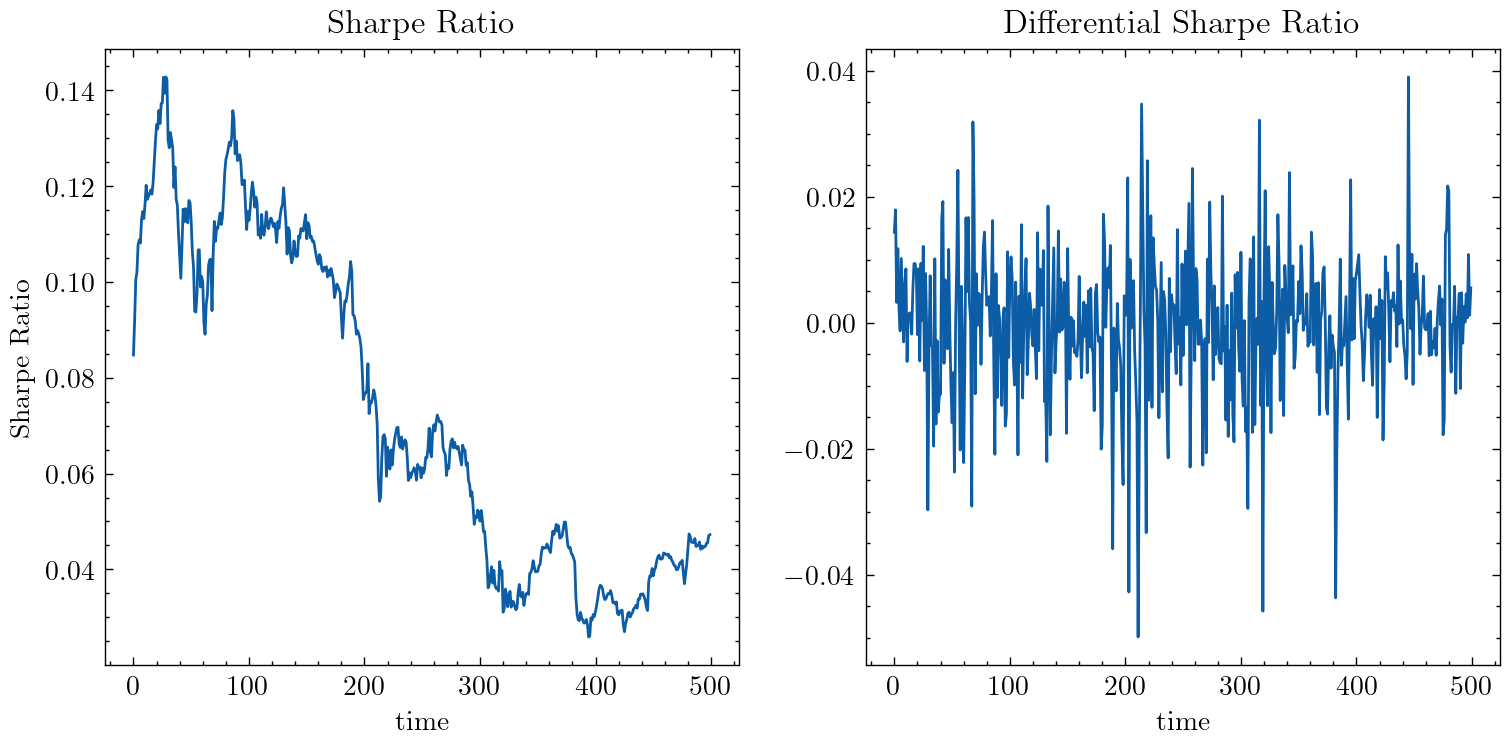

In [34]:
import matplotlib.pyplot as plt
import scienceplots
%matplotlib inline
with plt.style.context('science','ieee'):
    plt.figure(figsize=(9, 4),dpi=200) 
    ax = plt.subplot(1, 2, 1)
    plt.plot(ls1)
    plt.title('Sharpe Ratio')
    ax.set_xlabel('time')
    ax.set_ylabel('Sharpe Ratio')
    ax = plt.subplot(1, 2, 2)
    plt.plot(ls2)
    plt.title('Sharpe Ratio')
    ax.set_xlabel('time')
    plt.title('Differential Sharpe Ratio')
    plt.show()